<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for Regression
* Apply inverse transformations to be able to use these in a Regression context


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

/Users/fahee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In the following cells we will load the data and define some useful plotting functions.


In [2]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [5]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

zsh:1: command not found: wget


### Loading the Boston Housing Data


In [7]:

with open('data/boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)

"""
A pickle file is a serialized object file format in Python. It allows you to save and load Python objects in a binary 
format. Pickle files are commonly used for storing complex data structures, such as dictionaries, lists, and even custom 
objects.
"""

boston_data = boston['dataframe']
boston_description = boston['description']


In [8]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test


#### Using a Visual approach


#### Plotting a histogram:


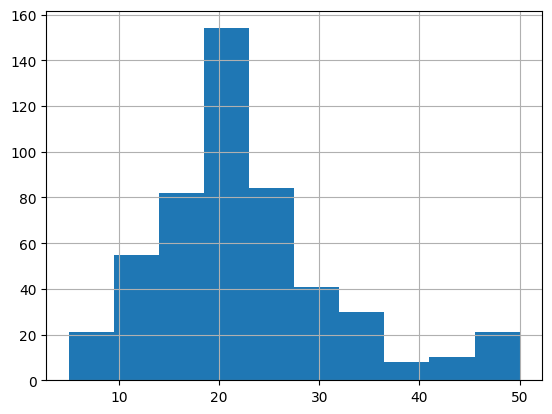

In [9]:
boston_data.MEDV.hist() # MEDV is a column name

The histogram does not look normal due to its right tail.


#### Using a Statistical Test


Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [ ]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [ ]:
normaltest(boston_data.MEDV.values)

p-value is _extremely_ low. Our **y** variable which we have been dealing with this whole time was not normally distributed!


### Apply transformations to make target variable more normally distributed for Regression


Linear Regression assumes a normally distributed residuals which can be aided by transforming **y** variable which is the target variable. Let's try some common transformations to try and get **y** to be normally distributed: 

* Log Transformation
* Square root Transformation
* Box cox Transformation


### Log Transformation


The log transformation can transform data that is significantly skewed right to be more normally distributed:


In [ ]:
data = plot_exponential_data()

In [ ]:
plt.hist(np.log(data));

**Apply transformation to Boston Housing data:**


In [ ]:
log_medv = np.log(boston_data.MEDV)

In [ ]:
log_medv.hist();

In [ ]:
normaltest(log_medv)

Conclusion: The output is closer to normal distribution, but still not completely normal.


### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


In [ ]:
data = plot_square_normal_data()

You may notice that the output still exhibits a slight right skew.


In [ ]:
plt.hist(np.sqrt(data));

#### Exercise


Apply the square root transformation to the Boston Housing data target and test whether the result is normally distributed.


In [ ]:
## Enter your code here


<details><summary>Click here for a sample python solution</summary>

```python
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

```


In [ ]:
normaltest(sqrt_medv)

### Box cox Transformation


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [ ]:
from scipy.stats import boxcox

In [ ]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [ ]:
lam

In [ ]:
boston_data['MEDV'].hist();

In [ ]:
plt.hist(boxcox_medv);

In [ ]:
normaltest(boxcox_medv)

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


### Testing regression:


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [ ]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]


**Create Polynomial Features**


In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [ ]:
# Enter your code here


<details><summary>Click here for a sample python solution</summary>

```python
    
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

```


As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [ ]:
y_train_bc.shape

In [ ]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [ ]:
from scipy.special import inv_boxcox

In [ ]:
inv_boxcox(boxcox_medv, lam)[:10]

In [ ]:
boston_data['MEDV'].values[:10]

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Use the **inv_boxcox()** function to get the transformed predicted values


In [ ]:
#Enter your code here


<details><summary>Click here for a sample python solution</summary>

```python
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

```


## Practice Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation.


In [ ]:
# Enter your code here


<details><summary>Click here for a sample python solution</summary>

```python
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

```


---
## Authors:

Niveditha


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-10-11 | 1.0 |Niveditha | Updated the notebook |




<hr/>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
